In [1]:
import os
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
path = 'data/kktv/'

In [2]:
new_data_frame_1 =pd.read_hdf(path +'new_data_1.h5',key='data')
new_data_frame_2 =pd.read_hdf(path +'new_data_2.h5',key='data')
new_data_frame_3 =pd.read_hdf(path +'new_data_3.h5',key='data')
new_data_frame_4 =pd.read_hdf(path +'new_data_4.h5',key='data')
new_data_frame_5 =pd.read_hdf(path +'new_data_5.h5',key='data')

In [3]:
final_data = pd.concat([new_data_frame_1, new_data_frame_2, new_data_frame_3, new_data_frame_4, new_data_frame_5], axis=0)

In [4]:
print new_data_frame_1.shape
print new_data_frame_2.shape
print new_data_frame_3.shape
print new_data_frame_4.shape
print new_data_frame_5.shape

(11350, 896)
(11237, 896)
(11460, 896)
(11650, 896)
(11442, 896)


In [5]:
new_label_frame =pd.read_hdf(path +'new_label.h5',key='data')
new_label_frame.index = new_label_frame.index.map(int)
#new_test_frame_1 =pd.read_hdf(path +'new_test_1.h5',key='data')
#new_test_frame_2 =pd.read_hdf(path +'new_test_2.h5',key='data')
#new_test_frame_3 =pd.read_hdf(path +'new_test_3.h5',key='data')

In [6]:
#new_label_frame = new_label_frame.iloc[:np.where(new_label_frame.index ==45712)[0][0],:]

In [7]:
ss= StandardScaler()
def final_preprocessing(frame):
    frame.columns = frame.columns.str[5:].astype(int)
    frame = frame.sort_index(axis=1)
    frame.index = frame.index.map(int)
    frame.sort_index(axis=0, inplace=True)
    #print frame.head()
    #frame = ss.fit_transform(frame)
    #frame.values.reshape(-1, 32, 28, 1)
    return frame

In [8]:
final_data = final_preprocessing(final_data)
print np.sum(final_data.isnull().any())
final_data.tail()

0


,100,101,102,103,110,111,112,113,120,121,...,3242,3243,3250,3251,3252,3253,3260,3261,3262,3263
user_id,,,,,,,,,,,,,,,,,,,,,
57154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57155,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
57156,0,0,0,0,0,0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
57157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#final_data_val = ss.fit_transform(final_data)
#final_data_val = final_data_val.reshape(-1, 32, 28, 1)
#print final_data_val.shape

In [10]:
#new_label_frame.tail()

In [11]:
final_data = final_data.join(new_label_frame)
print final_data.shape
final_data.head()

(57139, 924)


,100,101,102,103,110,111,112,113,120,121,...,time_slot_18,time_slot_19,time_slot_20,time_slot_21,time_slot_22,time_slot_23,time_slot_24,time_slot_25,time_slot_26,time_slot_27
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = ss.fit_transform(final_data.iloc[:, :896]).reshape(-1, 32, 28, 1)
y = final_data.iloc[:, 896:].values
print X.shape
print y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(57139, 32, 28, 1)
(57139, 28)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import Callback

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=[32, 28, 1]))
#model.add(MaxPooling2D(pool_size=(1, 1), strides=(1,1)))
model.add(MaxPooling2D(pool_size=(1, 4), strides=(1,1)))
#model.add(Dropout(0.25))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=[32, 28, 1]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4, 4), strides=(1,1)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
#model.add(Conv2D(64, 3, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))
#model.add(Dropout(0.25))
#model.add(BatchNormalization())
#model.add(Conv2D(64, 3, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 25, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 25, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 25, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 25, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 24, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 24, 32)        0         
__________

In [ ]:
'''
class PlotAcc(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.acc = []
        self.val_acc = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.acc, label="acc")
        plt.plot(self.x, self.val_acc, label="val_acc")
        plt.legend()
        plt.show();
        
plot_acc = PlotAcc()
'''

In [16]:
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

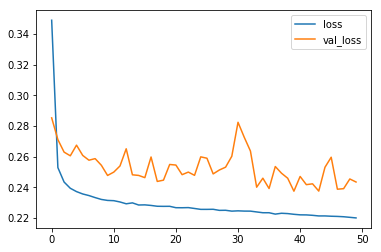

45711/45711 [==============================] - 424s - loss: 0.2201 - acc: 0.9175 - val_loss: 0.2435 - val_acc: 0.9145
('Test loss:', 0.24350423921560715)
('Test accuracy:', 0.91453324041877293)


In [17]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          callbacks=[plot_losses],
          validation_data=(X_test, y_test))
#history = model.fit(X, y, epochs=400, batch_size=len(X), verbose=2)
# plot metrics
#pyplot.plot(history.history['acc'])
#pyplot.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [18]:
final_ans = model.predict(X_test)

In [19]:
from sklearn.metrics import roc_auc_score
#roc_auc_score(np.where(final_ans>0.5, 1, 0), y_test)
roc_auc_score(y_test, final_ans)

0.8367428234051989

In [20]:
model.save(path + 'kktv.h5')
#model = load_model(path +'kktv.h5')
#model.predict(X_test[0:2])
#submit_ans = model.predict(final_training)